<a href="https://colab.research.google.com/github/GaneshkumarPatel/Supervised-ML--Transport-Demand-prediction/blob/main/Ganeshkumar_Patel_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [6]:
# Lets mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing some required libraries

import pandas as pd
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
path='/content/drive/MyDrive/almabetter/capstone projects/Demand prediction -ML capstone/'

In [7]:
# Load the dataset
df=pd.read_csv(path+'train_revised.csv')

# Print the first 5 rows of the dataframe.
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [8]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


### **Data Exploration**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 4.3+ MB


In [9]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [10]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


There are 51645 observations in the dataset and has 10 columns. Two integer columns and all other columns interpreted as objects. So we should have to convert some datatypes such as date etc.
'payment_receipt' has all unique values means no relation with target variable as for every ticket receipt will be unique and 'travel_to' it has only one element i.e. nairobi so its also not useful  for reression we will remove these both columns.

In [11]:
#As per data column description we know that every ride_id is unique and we can verify it do we got all rows as unique ride_id or some duplicate ride_id there...lets check
print('Number of records we got in dataset', df.shape[0])
print('Number of unique ride_id in our dataset',df.ride_id.nunique())

Number of records we got in dataset 51645
Number of unique ride_id in our dataset 6249


From above nuniue value count of ride_id we came to know that the data we got is ticket transaction data where ride_id has duplicate values too which indicates number of tickets as ride_id is uniuqe for specific route,day and time
So we have to count the number of tickets for the data we got, eventually it will be our target variable.

In [12]:
#Lets drop duplicate values if any so that we can count actual number of tickets
df=df.drop_duplicates()
df.shape

(51645, 10)

In [13]:
counts=dict(df.ride_id.value_counts())

#Now we found our target variable so let us delete the duplicate values from ride_id

df1=df.drop_duplicates('ride_id')

#Lets map the calculated counts values as target variable
df1['number_of_tickets_per_ride_id']=df1['ride_id'].map(counts)

In [14]:
print('Number of rows and columns became in final dataset after removing duplicate ride_id',df1.shape)
print('\n')
df1.head()

Number of rows and columns became in final dataset after removing duplicate ride_id (6249, 11)




,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets_per_ride_id
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [15]:
#just checking my code is right or not
df[df.ride_id==5778].count()

ride_id            31
seat_number        31
payment_method     31
payment_receipt    31
travel_date        31
travel_time        31
travel_from        31
travel_to          31
car_type           31
max_capacity       31
dtype: int64

In [33]:
#we will delete ome columns which are not looking useful for predicting number of tickets, if the value is unique or constant for each row then its not going to add any relation with target variable
df_to_be_used=df1.drop(['payment_receipt','travel_to','ride_id'],axis=1)

In [34]:
#Lets checck is there any missing value
df_to_be_used.isnull().sum()

seat_number                      0
payment_method                   0
travel_date                      0
travel_time                      0
travel_from                      0
car_type                         0
max_capacity                     0
number_of_tickets_per_ride_id    0
dtype: int64

**We don't see any null values in the dataset now.**

### **Feature Engineering and EDA**

In [35]:
# Now lets convert date and time column to single column and extract date time features from it by converting its data type from object to date type,its make our task easy rather than doing some string operations to get same information
df_to_be_used['travel_date']=pd.to_datetime(df_to_be_used['travel_date'] +' '+ df_to_be_used['travel_time'])
df_to_be_used.head()

,seat_number,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets_per_ride_id
0,15A,Mpesa,2017-10-17 07:15:00,7:15,Migori,Bus,49,1
1,14A,Mpesa,2017-11-19 07:12:00,7:12,Migori,Bus,49,1
2,8B,Mpesa,2017-11-26 07:05:00,7:05,Keroka,Bus,49,1
3,19A,Mpesa,2017-11-27 07:10:00,7:10,Homa Bay,Bus,49,5
4,11A,Mpesa,2017-11-27 07:12:00,7:12,Migori,Bus,49,31


In [48]:
#Lets build some new features extracted from date

df_to_be_used["day_of_week"]=df_to_be_used["travel_date"].dt.dayofweek
df_to_be_used["day_of_year"]=df_to_be_used["travel_date"].dt.dayofyear
df_to_be_used["year"]=df_to_be_used["travel_date"].dt.year
df_to_be_used["quarter"]=df_to_be_used["travel_date"].dt.quarter
df_to_be_used["month"]=df_to_be_used["travel_date"].dt.month
df_to_be_used['hour_booked']=df_to_be_used["travel_date"].dt.hour

In [27]:
df_to_be_used.seat_number.unique()

array(['15A', '14A', '8B', '19A', '11A', '22A', '1X', '1B', '1', '5',
       '16B', '8', '10', '3', '7', '2B', '3A', '9', '6', '2A', '4', '1A',
       '5A', '21A', '2', '25', '9B', '4A', '7B', '10B', '15B', '4B',
       '13B', '6A', '13A', '20B', '23B', '24A', '22B', '12B', '24B', '5B',
       '19B', '11B', '14B', '21B', '8A', '18A', '9A', '3B', '23A', '18B',
       '6B', '10A', '20A', '16A', '17B', '17A', '12A', '7A'], dtype=object)

In [47]:
#Extracting the new feature from seat number as we know mainly passenger books seats in meiddle  
a=pd.to_numeric((df_to_be_used['seat_number'].str.extract(r'(^\d*)').loc[:,0]))
df_to_be_used['seat_number'] = np.where((a>10) | (a<20) ,1,0)

In [49]:
#lets copy the dataset for further use
df_to_be_used1=df_to_be_used.copy()
df_to_be_used1.head()

,seat_number,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets_per_ride_id,day_of_week,day_of_year,year,quarter,month,hour_booked
0,1,Mpesa,2017-10-17 07:15:00,7:15,Migori,Bus,49,1,1,290,2017,4,10,7
1,1,Mpesa,2017-11-19 07:12:00,7:12,Migori,Bus,49,1,6,323,2017,4,11,7
2,1,Mpesa,2017-11-26 07:05:00,7:05,Keroka,Bus,49,1,6,330,2017,4,11,7
3,1,Mpesa,2017-11-27 07:10:00,7:10,Homa Bay,Bus,49,5,0,331,2017,4,11,7
4,1,Mpesa,2017-11-27 07:12:00,7:12,Migori,Bus,49,31,0,331,2017,4,11,7


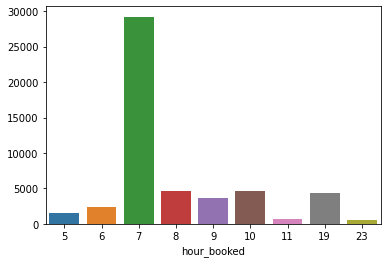

In [50]:
# number of tickets booking flow respected to clock hour time

booked_ticets_as_per_hour=df_to_be_used1.groupby('hour_booked')['number_of_tickets_per_ride_id'].sum().sort_values(ascending=False)
sns.barplot(x=booked_ticets_as_per_hour.index,y=booked_ticets_as_per_hour.values)

we observed that around 7:00 pm maximum bookings done 

In [51]:
#lets create feture based on above EDA
df_to_be_used1['early_morning_or_late_night']=np.where((df_to_be_used1['hour_booked']<8) | (df_to_be_used1['hour_booked']>18) ,1,0)


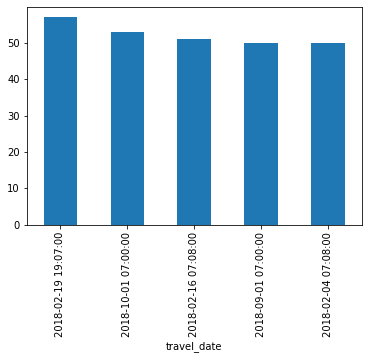

In [52]:
df_to_be_used1.groupby('travel_date')['number_of_tickets_per_ride_id'].sum().sort_values(ascending=False).head(5).plot.bar()

we can conclude that on date of 12/10/2017 we got maximum tickets booking around 800+ in our dataset

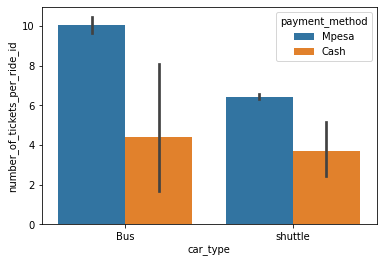

In [55]:
sns.barplot(x='car_type',y='number_of_tickets_per_ride_id',hue='payment_method',data=df_to_be_used1)

Maximum tickets booking done for Bus 


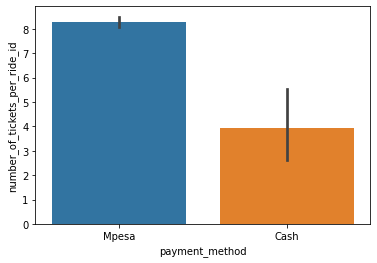

In [ ]:
sns.barplot(x='payment_method',y='number_of_tickets_per_ride_id',data=df_to_be_used1)

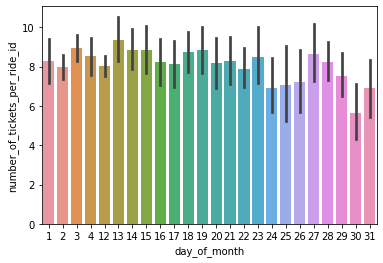

In [ ]:
sns.barplot(x='day_of_month',y='number_of_tickets_per_ride_id',data=df_to_be_used1)

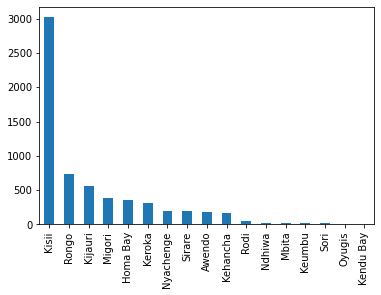

In [ ]:
df_to_be_used1['travel_from'].value_counts().plot.bar()

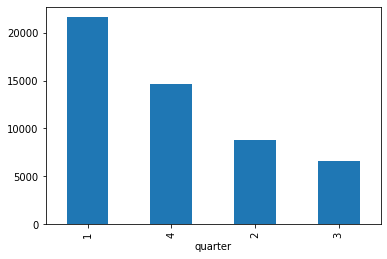

In [ ]:
df_to_be_used1.groupby('quarter')['number_of_tickets_per_ride_id'].sum().sort_values(ascending=False).head().plot(kind='bar')

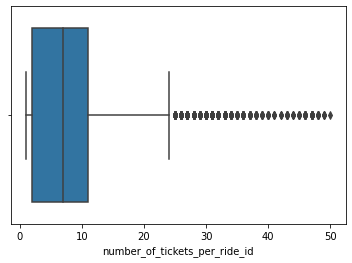

In [ ]:
#lets check the boxplot distribution of our target variable
sns.boxplot(df_to_be_used1.number_of_tickets_per_ride_id)


Text(0.5, 0, 'Car Type')

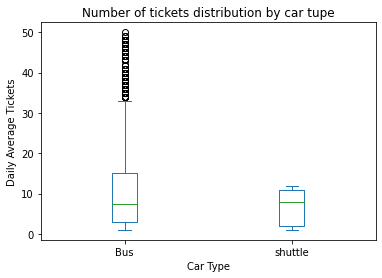

In [57]:
df_to_be_used.groupby(['travel_date', 'car_type'])['number_of_tickets_per_ride_id'].mean().unstack().plot(kind="box")
plt.title('Number of tickets distribution by car tupe')
plt.ylabel('Daily Average Tickets')
plt.xlabel('Car Type')

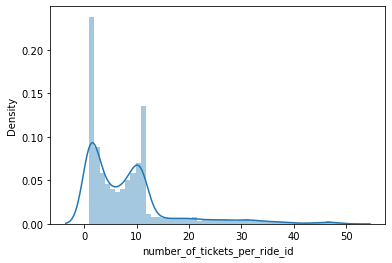

In [ ]:
sns.distplot(df_to_be_used1.number_of_tickets_per_ride_id)

We observed that outlier present in our dataset which right skewed or target variable we will try to limit those outliers and see any difference in target distribution

In [58]:
df_to_be_used1.number_of_tickets_per_ride_id[df_to_be_used1.number_of_tickets_per_ride_id>30]=30

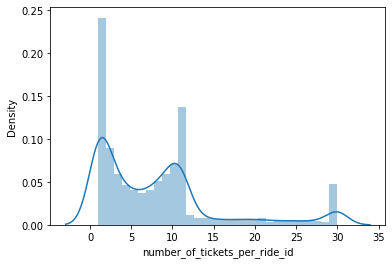

In [59]:
sns.distplot(df_to_be_used1.number_of_tickets_per_ride_id)

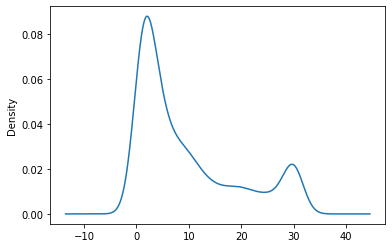

In [60]:
((df_to_be_used1[df_to_be_used1['car_type']=='Bus']['number_of_tickets_per_ride_id'])).plot.density()

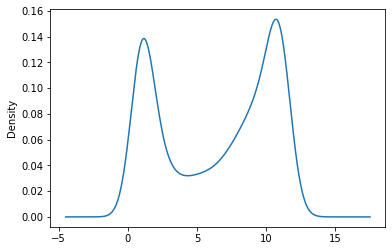

In [ ]:
((df_to_be_used1[df_to_be_used1['car_type']=='shuttle']['number_of_tickets_per_ride_id'])).plot.density()

In [125]:
# reference: https://www.rome2rio.com/map/Ndhiwa/Nairobi#r/Bus

outside_datasset={'Migori':{'distance':372.7,'travel_time':7,'avg_cost':1350},
          'Keroka':{'distance':332,'travel_time':5.48,'avg_cost':6400},
          'Kisii':{'distance':307.1,'travel_time':5.28,'avg_cost':1070},
          'Homa Bay':{'distance':336.2,'travel_time':6,'avg_cost':850},
          'Keumbu':{'distance':307.1,'travel_time':5.48,'avg_cost':6268},
          'Rongo':{'distance':331.6,'travel_time':6.42,'avg_cost':950},
          'Kijauri':{'distance':344,'travel_time':5.58,'avg_cost':8100},
          'Oyugis':{'distance':331.6,'travel_time':5.40,'avg_cost':650},
          'Awendo':{'distance':357,'travel_time':6.11,'avg_cost':7800},
          'Sirare':{'distance':394.2,'travel_time':7.14,'avg_cost':925},
          'Nyachenge':{'distance':349.5,'travel_time':6.48,'avg_cost':8800},
          'Kehancha':{'distance':426,'travel_time':7.48,'avg_cost':1560},
          'Kendu Bay':{'distance':349.7,'travel_time':6,'avg_cost':25},
          'Sori':{'distance':409.6,'travel_time':7,'avg_cost':10400},
          'Rodi':{'distance':375,'travel_time':6,'avg_cost':2650},
          'Mbita':{'distance':397.5,'travel_time':7,'avg_cost':650},
          'Ndhiwa':{'distance':395,'travel_time':6,'avg_cost':5800}}

In [126]:
data_to_be_mapped=pd.DataFrame(outside_datasset)
data_to_be_mapped



,Migori,Keroka,Kisii,Homa Bay,Keumbu,Rongo,Kijauri,Oyugis,Awendo,Sirare,Nyachenge,Kehancha,Kendu Bay,Sori,Rodi,Mbita,Ndhiwa
distance,372.7,332.00,307.10,336.2,307.10,331.60,344.00,331.6,357.00,394.20,349.50,426.00,349.7,409.6,375,397.5,395
travel_time,7.0,5.48,5.28,6.0,5.48,6.42,5.58,5.4,6.11,7.14,6.48,7.48,6.0,7.0,6,7.0,6
avg_cost,1350.0,6400.00,1070.00,850.0,6268.00,950.00,8100.00,650.0,7800.00,925.00,8800.00,1560.00,25.0,10400.0,2650,650.0,5800


In [127]:
keys=list(data_to_be_mapped.columns)
distance=list(data_to_be_mapped[:1].values[0])
travel_time=list(data_to_be_mapped[1:2].values[0])
avg_cost=list(data_to_be_mapped[2:3].values[0])


In [128]:
df_to_be_used1['distance']=df_to_be_used1['travel_from'].map(dict(zip(keys,distance)))
df_to_be_used1['travel_time_required']=df_to_be_used1['travel_from'].map(dict(zip(keys,travel_time)))
df_to_be_used1['avg_cost']=df_to_be_used1['travel_from'].map(dict(zip(keys,avg_cost)))
df_to_be_used1.head(2)

,seat_number,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets_per_ride_id,day_of_week,day_of_year,year,quarter,month,hour_booked,early_morning_or_late_night,distance,travel_time_required,avg_cost
0,1,Mpesa,2017-10-17 07:15:00,7:15,Migori,Bus,49,1,1,290,2017,4,10,7,1,372.7,7.0,1350.0
1,1,Mpesa,2017-11-19 07:12:00,7:12,Migori,Bus,49,1,6,323,2017,4,11,7,1,372.7,7.0,1350.0


In [134]:
a=(df_to_be_used1.hour_booked)>7
b=(df_to_be_used1.travel_time_required+df_to_be_used1.hour_booked)>21
df_to_be_used1['rush_time']=np.where(a|b,1,0)

In [ ]:
df_to_be_used1['max_capacity']=np.where(df_to_be_used1.max_capacity==49,1,0)

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df_to_be_used1["travel_from_time"]=df_to_be_used1.travel_from.map(time)

In [ ]:
df_to_be_used1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 51644
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   payment_method                 6249 non-null   object        
 1   travel_date                    6249 non-null   datetime64[ns]
 2   travel_time                    6249 non-null   float64       
 3   travel_from                    6249 non-null   object        
 4   car_type                       6249 non-null   object        
 5   max_capacity                   6249 non-null   int64         
 6   number_of_tickets_per_ride_id  6249 non-null   int64         
 7   day_of_week                    6249 non-null   int64         
 8   day_of_year                    6249 non-null   int64         
 9   year                           6249 non-null   int64         
 10  quarter                        6249 non-null   int64         
 11  month           

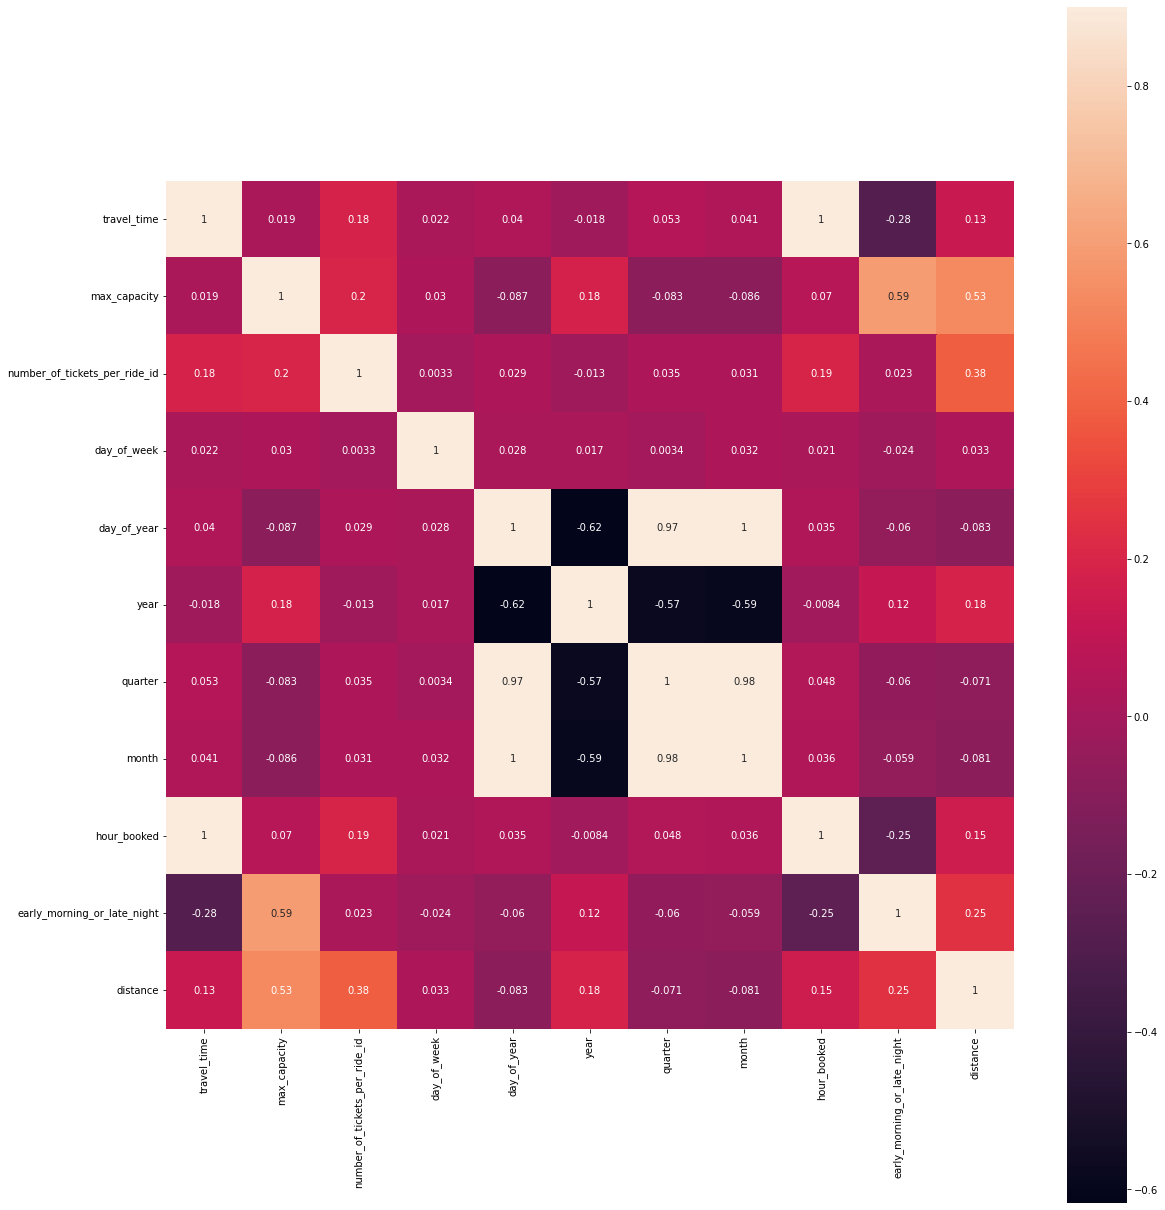

In [ ]:
#analysing data correlation with a correlation map
corrmat = df_to_be_used1.corr()
plt.subplots(figsize=(19,22))
sns.heatmap(corrmat, vmax=0.9, square=True,annot=True)

Now let us find the distance of each origin point from the destination point.
I used Nairobi Map to estimate the distance from origin point to destination map.




In [ ]:
df_to_be_used2=df_to_be_used1.drop(['day_of_week','day_of_year','year'],axis=1)

In [ ]:
df_to_be_used2

,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets_per_ride_id,quarter,month,hour_booked,early_morning_or_late_night,distance,travel_from_time,hod_arrived_date,minute_arrived_date,is_rush_hour
0,Mpesa,2017-10-17,7.250000,Migori,Bus,1,1,4,10,7,1,370.9,428,7,8,1
1,Mpesa,2017-11-19,7.200000,Migori,Bus,1,1,4,11,7,1,370.9,428,7,8,1
2,Mpesa,2017-11-26,7.083333,Keroka,Bus,1,1,4,11,7,1,279.8,300,5,0,0
3,Mpesa,2017-11-27,7.166667,Homa Bay,Bus,1,5,4,11,7,1,305.5,420,7,0,1
4,Mpesa,2017-11-27,7.200000,Migori,Bus,1,30,4,11,7,1,370.9,428,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51575,Mpesa,2018-04-20,23.166667,Ndhiwa,Bus,1,11,2,4,23,1,369.6,420,7,0,1
51605,Mpesa,2018-04-20,7.083333,Ndhiwa,Bus,1,11,2,4,7,1,369.6,420,7,0,1
51639,Mpesa,2018-04-20,7.150000,Rongo,Bus,1,1,2,4,7,1,330.3,381,6,21,0
51640,Mpesa,2018-04-20,8.000000,Awendo,Bus,1,1,2,4,8,0,349.5,398,6,38,0


In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
time1={}
for key in time.keys(): 
    time1[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
df_to_be_used1["Date_of_traveling_from_origin"]=df_to_be_used1.travel_from.map(time1)

# find the date of arrival at distination
df_to_be_used1["arrival_date"]=df_to_be_used1.travel_date + df_to_be_used1.Date_of_traveling_from_origin
df_to_be_used1["hod_arrived_date"]=df_to_be_used1["arrival_date"].dt.hour
df_to_be_used1["minute_arrived_date"]=df_to_be_used1["arrival_date"].dt.minute
del df_to_be_used1["Date_of_traveling_from_origin"],df_to_be_used1["arrival_date"]
df_to_be_used1["is_rush_hour"]=0
df_to_be_used1.loc[df_to_be_used1.hod_arrived_date.between(7,17),"is_rush_hour"]=1

In [ ]:
df_to_be_used2=pd.get_dummies(df_to_be_used2,drop_first=True)
df_to_be_used2.head()

,travel_date,max_capacity,number_of_tickets_per_ride_id,quarter,month,hour_booked,payment_method_Mpesa,travel_time_10:10,travel_time_10:20,travel_time_10:30,travel_time_10:40,travel_time_10:50,travel_time_10:51,travel_time_10:52,travel_time_10:53,travel_time_10:54,travel_time_10:55,travel_time_10:56,travel_time_10:57,travel_time_10:58,travel_time_10:59,travel_time_11:00,travel_time_11:01,travel_time_11:02,travel_time_11:03,travel_time_11:04,travel_time_11:05,travel_time_11:06,travel_time_11:07,travel_time_11:08,travel_time_11:09,travel_time_19:03,travel_time_19:04,travel_time_19:05,travel_time_19:06,travel_time_19:07,travel_time_23:09,travel_time_23:10,travel_time_5:00,travel_time_5:10,...,travel_time_7:09,travel_time_7:10,travel_time_7:11,travel_time_7:12,travel_time_7:13,travel_time_7:14,travel_time_7:15,travel_time_7:20,travel_time_7:30,travel_time_7:40,travel_time_7:50,travel_time_8:00,travel_time_8:10,travel_time_8:20,travel_time_8:30,travel_time_8:40,travel_time_8:50,travel_time_9:00,travel_time_9:10,travel_time_9:20,travel_time_9:30,travel_time_9:40,travel_time_9:50,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,2017-10-17,49,1,4,10,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2017-11-19,49,1,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2017-11-26,49,1,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-11-27,49,5,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-11-27,49,31,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### **Encoding Categorical features**

### Training the models

In [ ]:
feature_col = df_to_be_used2.drop(['number_of_tickets_per_ride_id','travel_date'],axis=1).columns

In [ ]:
df_to_be_used2[feature_col]

,max_capacity,quarter,month,hour_booked,payment_method_Mpesa,travel_time_10:10,travel_time_10:20,travel_time_10:30,travel_time_10:40,travel_time_10:50,travel_time_10:51,travel_time_10:52,travel_time_10:53,travel_time_10:54,travel_time_10:55,travel_time_10:56,travel_time_10:57,travel_time_10:58,travel_time_10:59,travel_time_11:00,travel_time_11:01,travel_time_11:02,travel_time_11:03,travel_time_11:04,travel_time_11:05,travel_time_11:06,travel_time_11:07,travel_time_11:08,travel_time_11:09,travel_time_19:03,travel_time_19:04,travel_time_19:05,travel_time_19:06,travel_time_19:07,travel_time_23:09,travel_time_23:10,travel_time_5:00,travel_time_5:10,travel_time_5:20,travel_time_5:30,...,travel_time_7:09,travel_time_7:10,travel_time_7:11,travel_time_7:12,travel_time_7:13,travel_time_7:14,travel_time_7:15,travel_time_7:20,travel_time_7:30,travel_time_7:40,travel_time_7:50,travel_time_8:00,travel_time_8:10,travel_time_8:20,travel_time_8:30,travel_time_8:40,travel_time_8:50,travel_time_9:00,travel_time_9:10,travel_time_9:20,travel_time_9:30,travel_time_9:40,travel_time_9:50,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,49,4,10,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,49,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,49,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,49,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,49,4,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51575,49,2,4,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51605,49,2,4,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51639,49,2,4,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51640,49,2,4,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Training Gradient Boosting Regressor**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features, label = df_to_be_used2[feature_col],df_to_be_used2.iloc[:,df_to_be_used2.columns=='number_of_tickets_per_ride_id']

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(features,label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  

KeyError: ignored

In [ ]:
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
0,max_capacity,21883.702315
33,travel_time_19:07,1499.815345
96,travel_from_Sirare,1304.357575
82,travel_from_Homa Bay,1041.000548
98,car_type_shuttle,940.600417
...,...,...
93,travel_from_Oyugis,11.144765
26,travel_time_11:07,10.878222
28,travel_time_11:09,10.189628
84,travel_from_Kendu Bay,3.286008


In [ ]:
from sklearn.model_selection import train_test_split
#train, test split(we will validate our model on 20%test data and will build model with CV)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=5)

In [ ]:
# X_train=df_to_be_used2[feature_col].values
# Y_train=df_to_be_used2['number_of_tickets_per_ride_id'].values

# #Reshaping target column to avoid Sklearb throwing in a warning 
# Y_train=Y_train.ravel()

# split_test_size=0.30

# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, Ytrain, Ytest= train_test_split(X_train,Y_train, test_size=split_test_size, random_state=260)

KeyError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
kfold=KFold(n_splits=5)
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
poly=PolynomialFeatures(degree=1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
Xtrain=poly.fit_transform(Xtrain)
Xtest=poly.transform(Xtest)
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)


In [ ]:
gbrt = GradientBoostingRegressor(criterion='mse',random_state=10,n_estimators=100).fit(Xtrain,Ytrain)
cv = cross_val_score (gbrt,Xtrain,Ytrain,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=gbrt.predict(Xtest)
MAE=mean_absolute_error(Ytest,Ypred)
MSE=mean_squared_error(Ytest,Ypred)
print("GBR MAE:", MAE)
print("GBR MSE:", MSE)
print("GBR Training set score: {:.5f}".format(gbrt.score(Xtrain,Ytrain)))
print("GBR Test set score: {:.5f}".format(gbrt.score(Xtest,Ytest)))

 Average CV is:  0.5397744178090184
GBR MAE: 3.998631702925281
GBR MSE: 33.716005713541556
GBR Training set score: 0.57686
GBR Test set score: 0.52593


In [ ]:
X_train,X_test=Xtrain,Xtest
y_train,y_test=Ytrain,Ytest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,ShuffleSplit,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

cv_split = ShuffleSplit(n_splits = 10, test_size = 0.1, train_size = 0.9, random_state = 0)
pipeline = Pipeline([
     ('clf', RandomForestRegressor()) #step2 - classifier
])
pipeline.steps

clfs = []
clfs.append(LinearRegression())
clfs.append(SVR())
clfs.append(ElasticNet())
# clfs.append(Lasso()) 
# clfs.append(DecisionTreeRegressor())
clfs.append(RandomForestRegressor())
clfs.append(ExtraTreesRegressor())               
clfs.append(AdaBoostRegressor())                 
clfs.append(XGBRegressor())

results=[]
results1=[]
results2=[]
results3=[]
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv_split, return_train_score=True)
    #default parameter fit for comparision with CV Score and Default fit score
    pipeline.set_params(clf = classifier)
    pipeline.fit(X_train,y_train)
    train_acc=pipeline.score(X_train, y_train)
    test_acc=pipeline.score(X_test, y_test)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            if key=='test_score':
                results.append({'Test_mean_Score': values.mean(), 'Test_Std': values.std()})
    for key, values in scores.items():
            if key=='train_score':
                results1.append({'Train_mean_Score': values.mean(), 'Train_Std': values.std()})
    for key, values in scores.items():
            if key=='fit_time':
                results2.append({'Fit_time': values.mean()})

    results3.append({'Def_Train_score':train_acc,'Def_Test_score':test_acc})

---------------------------------
LinearRegression()
-----------------------------------
---------------------------------
SVR()
-----------------------------------
---------------------------------
ElasticNet()
-----------------------------------
---------------------------------
RandomForestRegressor()
-----------------------------------
---------------------------------
ExtraTreesRegressor()
-----------------------------------
---------------------------------
AdaBoostRegressor()
-----------------------------------
[19:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecate

In [ ]:
from sklearn.metrics import mean_squared_error
results=pd.DataFrame(results,index=['LR','SVR','EN','RF','ET', 'AB','XGB'])
results1=pd.DataFrame(results1,index=['LR','SVR','EN','RF','ET', 'AB','XGB'])
results2=pd.DataFrame(results2,index=['LR','SVR','EN','RF','ET', 'AB','XGB'])
results3=pd.DataFrame(results3,index=['LR','SVR','EN','RF','ET', 'AB','XGB'])

In [ ]:
Compare_models=pd.concat((results1,results,results3),axis=1)
Compare_models.sort_values(by='Test_mean_Score',ascending=False)

,Train_mean_Score,Train_Std,Test_mean_Score,Test_Std,Def_Train_score,Def_Test_score
XGB,0.579856,0.005168,5.247090e-01,4.411944e-02,0.575574,0.528835
RF,0.718802,0.002842,5.142617e-01,5.502993e-02,0.710728,0.499986
ET,0.726763,0.002779,4.750587e-01,5.825036e-02,0.717847,0.464490
SVR,0.492912,0.006731,4.485754e-01,5.299697e-02,0.496102,0.478069
EN,0.349304,0.006977,3.346575e-01,3.234257e-02,0.348041,0.334180
AB,0.290677,0.046393,2.819820e-01,9.297220e-02,0.280087,0.234180
LR,0.498567,0.006130,-7.959386e+24,2.387816e+25,0.496850,0.457138


In [ ]:
pipeline.set_params(clf= XGBRegressor())
  
param_grid = {
    'clf__learning_rate' : np.linspace(0.01,0.2),
    'clf__n_estimators' : [20,35,55,75,85,95],
    'clf__random_state': np.arange(1,50),
    'clf__max_depth': [3,4,5,6,7,8,10]
}

xgb_grid = RandomizedSearchCV(pipeline, param_grid, cv=cv_split, n_iter = 10)
xgb_grid.fit(X_train, y_train)


[19:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=0.9),
                   estimator=Pipeline(steps=[('clf', XGBRegressor())]),
                   param_distributions={'clf__learning_rate': array([0.01      , 0.01387755, 0.0177551 , 0.02163265, 0.0255102 ,
       0.02938776, 0.03326531, 0.03714286, 0.04102041, 0.04489796,
       0.04877551, 0.05265306, 0.05653061, 0.06040816, 0.06428571,
       0...
       0.14571429, 0.14959184, 0.15346939, 0.15734694, 0.16122449,
       0.16510204, 0.16897959, 0.17285714, 0.17673469, 0.18061224,
       0.1844898 , 0.18836735, 0.1922449 , 0.19612245, 0.2       ]),
                                        'clf__max_depth': [3, 4, 5, 6, 7, 8,
                                                           10],
                                        'clf__n_estimators': [20, 35, 55, 75,
                                                              85, 95],
                                        'clf__random_state': arr

In [ ]:
y_predict1 = xgb_grid.predict(X_test)

In [ ]:
r_square_score =  r2_score(y_test, y_predict1)
print('r_square_score: {0}'.format(r_square_score))

NameError: ignored

In [ ]:
MSE=mean_squared_error(y_test, y_predict1)
print('mean_squared_error: {0}'.format(MSE))

mean_squared_error: 32.644986270308564


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

### **Training XGboost**

In [ ]:
import xgboost as xgb
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2


KeyError: ignored

In [ ]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Decision Tree Regressor**

In [ ]:
X = data[features_col].copy()
y = data['number_of_tickets'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
dec_reg =RandomForestRegressor(random_state=0,max_depth=2)

In [ ]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
dec_reg.score(X_train,y_train)

0.3465436994478067

In [ ]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### **Grid Search CV on XGboost algorithm**

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[14:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:01] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

0.641458623710796

In [ ]:

#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:

r2

0.641458623710796

In [ ]:
adj_r2

-0.04484605087014715

In [ ]:
importances = reg_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()

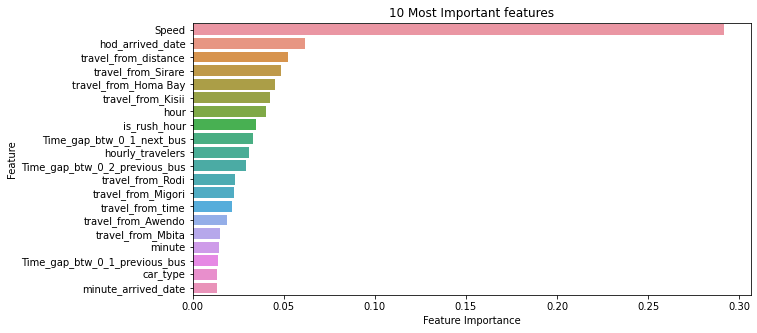

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

### **Evaluating the model**

In [ ]:
 onnn

In [ ]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2)
print('Adjusted R2 Score: ',adj_r2)


Mean Squared Error (MSE):  11.849300888127685
Mean Absolute Error (MAE):  2.2667203277465098
Root Mean Squared Error (MSE):  3.442281349356511
R2 Score:  0.8421125457491907
Adjusted R2 Score:  0.838668297862708
